<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/Important.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission Guidelines:**


*   Once you are done with the examination please, File -> Download .ipynb
*   Add your full name to the file name: Firstname_Lastname.ipynb
*   Upload the .ipynb file to Moodle.

# **Examination Starts Here:**

## Data Download (0 points)
*   Run the code below to download the Pickle file and load it into a variable

In [105]:
import pickle

!wget https://storage.googleapis.com/adsa-data/flower-classification/flower.pickle

with open('flower.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

--2024-12-12 10:37:36--  https://storage.googleapis.com/adsa-data/flower-classification/flower.pickle
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247872029 (236M) [application/octet-stream]
Saving to: ‘flower.pickle.5’

flower.pickle.5     100%[===================>] 236.39M  25.2MB/s    in 11s     

2024-12-12 10:37:47 (22.2 MB/s) - ‘flower.pickle.5’ saved [247872029/247872029]



## Data Preparation (10 points)
*   The Pickle *dataset* contains a dictionary with 2 keys *image* and *label*
 * **image** contains the pictures
 * **label** contains the class names
*   Splits the dataset into X_train, X_test, y_train, y_test
*   Print number of examples in both dataset, image shape, and number of classes

In [106]:
from sklearn.model_selection import train_test_split


X = dataset['image']
y = dataset['label']


train, test, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.model_selection import train_test_split


X = dataset['image']
y = dataset['label']


train_conf, test_conf, train_label_conf, test_label_conf = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
print(" The shape of the train and test respectively")
print("train shape",train.shape)
print("test shape",test.shape)
print("train label shape",train_label.shape)
print("test label shape",test_label.shape)

 The shape of the train and test respectively
train shape (2936, 150, 150, 3)
test shape (734, 150, 150, 3)
train label shape (2936,)
test label shape (734,)


In [109]:
print("the number of  examples of train and test respectively")
print("lenght of train",len(train))
print("lenght of test",len(test))
print("lenght of train label",len(train_label))
print("lenght of test label ",len(test_label))

the number of  examples of train and test respectively
lenght of train 2936
lenght of test 734
lenght of train label 2936
lenght of test label  734


In [110]:
import numpy as np

print("unique classes")
classes=np.unique(train_label)

print(len(classes))

unique classes
5


## Data Visualization (20 points)
Display 5 images from each class in training dataset

In [111]:
import numpy as np

zipped_data = list(zip(train, train_label))


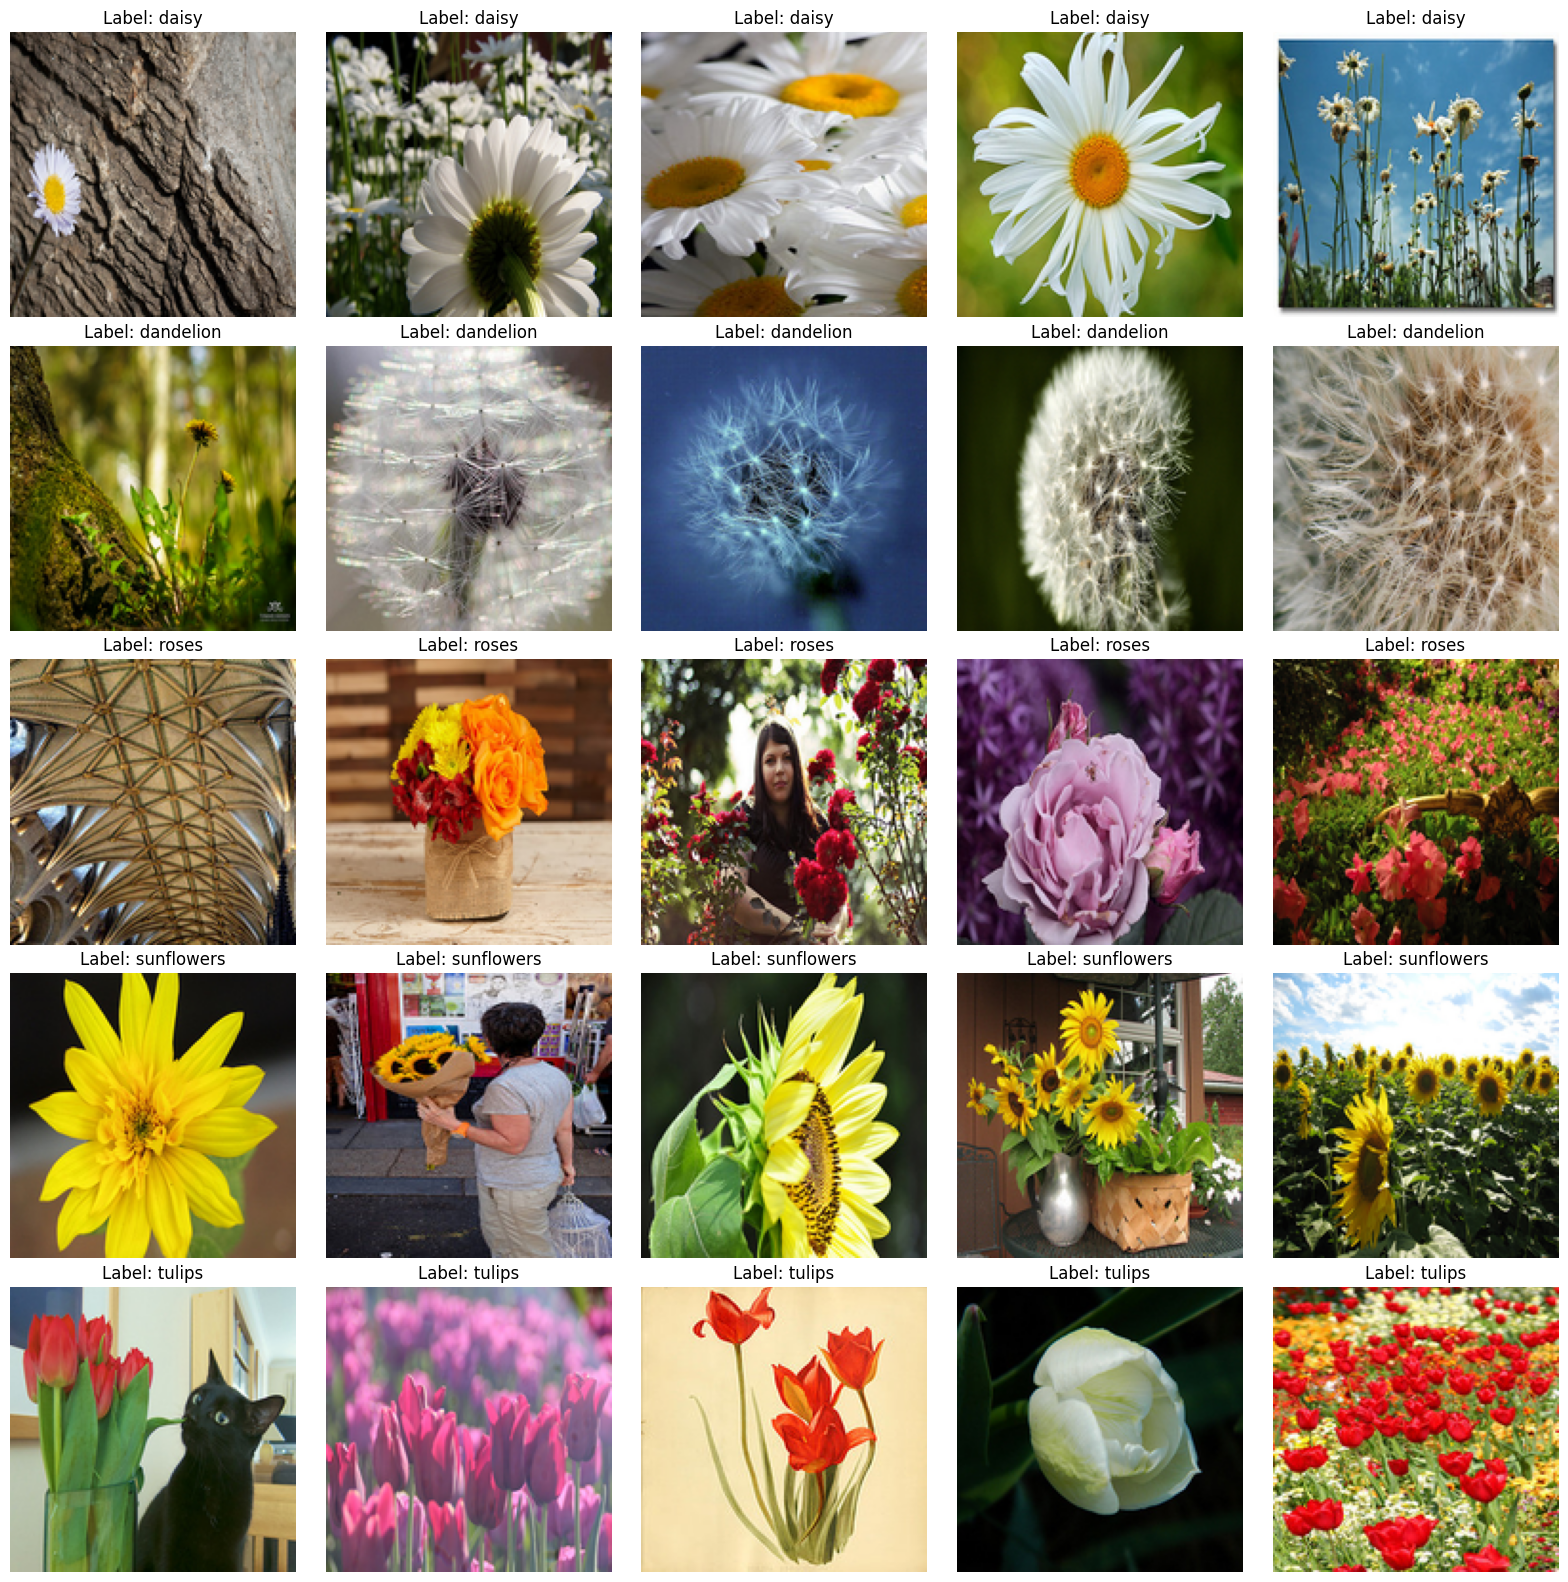

In [112]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = np.unique(train_label)

num_images_per_label = 5

num_rows = 5
fig, axs = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

axs = axs.flatten()

idx = 0
for label in unique_labels:
    label_indices = [i for i, (_, l) in enumerate(zipped_data) if l == label]
    selected_indices = np.random.choice(label_indices, size=num_images_per_label, replace=False)

    for i, img_idx in enumerate(selected_indices):
        image, _ = zipped_data[img_idx]
        axs[idx].imshow(image, cmap='gray')
        axs[idx].set_title(f'Label: {label}')
        axs[idx].axis('off')
        idx += 1

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


Print out class distribution of training set

Number of images for each class:
Class daisy: 513 images
Class dandelion: 733 images
Class roses: 509 images
Class sunflowers: 551 images
Class tulips: 630 images


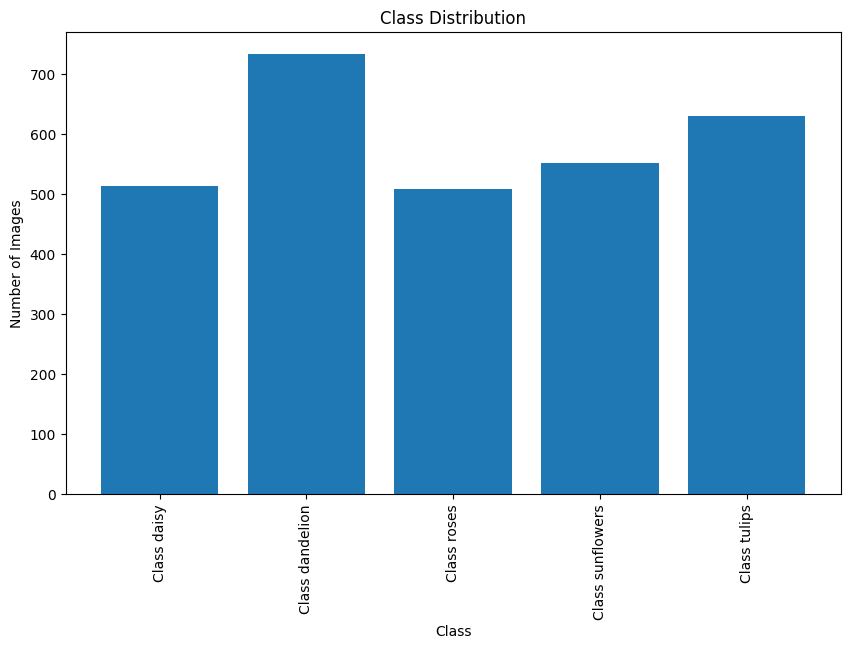

In [113]:

from collections import Counter

# Count the occurrences of each label in zipped_data
label_counts = Counter(label for _, label in zipped_data)

# Print the number of images for each class
print("Number of images for each class:")
for label, count in sorted(label_counts.items()):
    print(f"Class {label}: {count} images")

class_labels = [f'Class {label}' for label in sorted(label_counts.keys())]
class_counts = [count for _, count in sorted(label_counts.items())]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(class_labels, class_counts)

ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()



## Model Design (15 points)
Design a neuron network using the Functional API.

The goal is to achieve a highest accuracy possible without transfer learning.

In [114]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ZeroPadding2D, GlobalAveragePooling2D

import tensorflow as tf
from keras.regularizers import l2


In [115]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learningrate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5,min_lr=0.00001)

callbacks=[earlystop,learningrate_reduction]

In [116]:
#encoding labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_label = label_encoder.fit_transform(train_label)
test_label = label_encoder.fit_transform(test_label)

In [117]:
from sklearn.model_selection import train_test_split
test, val, test_label, val_label = train_test_split(test, test_label, test_size=0.2)

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (150,150,3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu',  padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Why did you choose that design?

In [119]:
# Answer here
print("At first, I start building the network by rescaling the image since image matrix will have values range from 0 to 255 i.e [0,255]. Thus, by rescaling, the values in the matrix rescales to [0,1]. Then,I started building convolution neural netwrok which is best for feature extraction and started from low number of units to larger units in power of 2 (like power set which is power of 2 of set). It starts extracting maximum features of the images at the beginning and slowly converging it to minimum features of the images. I have also used maxpooling layer here. Max pooling takes an image and essentially shrinks it to a lower resolution. It does this to help the model be robust to translation (objects moving side to side), and also makes our model faster. Then, I flatten the matrix. Flatten takes the output of one layer which is multidimensional, and flattens it into a one-dimensional array. The output is called a feature vector and will be connected to the final classification layer.Then, at last, Dense layer i.e fully connected layer. Its used for classification and here, we have 5 different classes, so the units are 5. I have used adam(one of the best optimizer) and sparse categorical cross entropy for loss funtion ")

At first, I start building the network by rescaling the image since image matrix will have values range from 0 to 255 i.e [0,255]. Thus, by rescaling, the values in the matrix rescales to [0,1]. Then,I started building convolution neural netwrok which is best for feature extraction and started from low number of units to larger units in power of 2 (like power set which is power of 2 of set). It starts extracting maximum features of the images at the beginning and slowly converging it to minimum features of the images. I have also used maxpooling layer here. Max pooling takes an image and essentially shrinks it to a lower resolution. It does this to help the model be robust to translation (objects moving side to side), and also makes our model faster. Then, I flatten the matrix. Flatten takes the output of one layer which is multidimensional, and flattens it into a one-dimensional array. The output is called a feature vector and will be connected to the final classification layer.Then, 

## Model Training (10 points)
Train the model and stop before it overfits.

In [120]:
history = model.fit(train, train_label, epochs=20, validation_data=(val, val_label),callbacks=callbacks,batch_size=32)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.3385 - loss: 1.4546 - val_accuracy: 0.5374 - val_loss: 1.0744 - learning_rate: 0.0010
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5689 - loss: 1.0598 - val_accuracy: 0.5578 - val_loss: 1.0836 - learning_rate: 0.0010
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6339 - loss: 0.9357 - val_accuracy: 0.6327 - val_loss: 1.0123 - learning_rate: 0.0010
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6695 - loss: 0.8358 - val_accuracy: 0.6803 - val_loss: 0.9561 - learning_rate: 0.0010
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7076 - loss: 0.7576 - val_accuracy: 0.5986 - val_loss: 1.0015 - learning_rate: 0.0010
Epoch 6/20
89/92 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7140 - loss: 0.7343
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7141 - loss: 0.7341 - val_a

In [121]:
test_loss, test_acc = model.evaluate(test, test_label)

print(f"Test accuracy: {test_acc}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7627 - loss: 0.8504
Test accuracy: 0.7478705048561096


Why did you choose that batch size?

In [122]:
# Answer here

print("Batching acts like a set of cards. We will shuffle the whole dataset so that the probability of drawing any data entity  is truly random. For each step of the training, we will draw a number of entities equal to the batch size  and  use them to train the model. Because the batch is a random sample,it can do a good job of representing all of our data even though it is a tiny fraction of the whole set.In practice, a batch size of 32 or 64 entities does well. Run the cell below to see what kind of batches we'll be training our model with.")

Batching acts like a set of cards. We will shuffle the whole dataset so that the probability of drawing any data entity  is truly random. For each step of the training, we will draw a number of entities equal to the batch size  and  use them to train the model. Because the batch is a random sample,it can do a good job of representing all of our data even though it is a tiny fraction of the whole set.In practice, a batch size of 32 or 64 entities does well. Run the cell below to see what kind of batches we'll be training our model with.


## Training Visualization (5 points)
Plot training history with training and validation's loss and accuracy

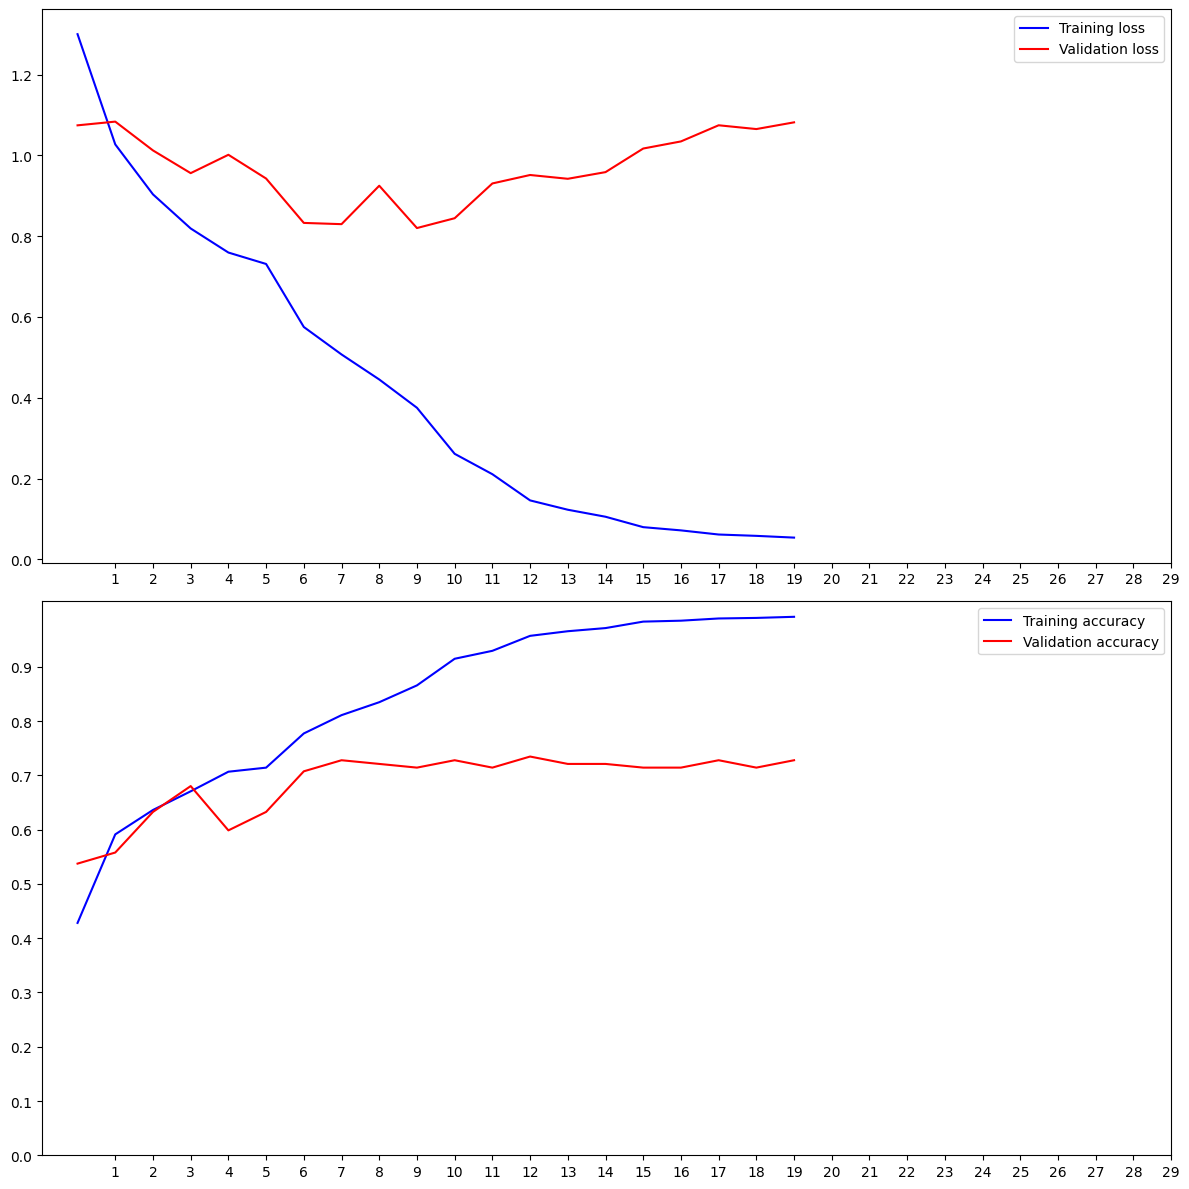

In [123]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.legend()
ax1.set_xticks(np.arange(1, 30, 1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.legend()
ax2.set_xticks(np.arange(1, 30, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

plt.tight_layout()
plt.show()

Look at the visualization and point out at which epoch the model starts overfitting

In [124]:
# Answer here

#I believe overfitting started at epoch 3 where the validation loss starts high to the training loss.

## Transfer Learning (20 points)
1. Choose an appropriate pre-trained model that use the EfficientNet architecture
2. Freeze all weights besides the last 20 layers



In [125]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Define input shape
IMG_SHAPE = (150, 150, 3)
NUM_CLASSES = 5

# Create the base model from the pre-trained model EfficientNetB0
base_model = EfficientNetB0(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# Freeze all layers except the last 20
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Add a classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model_eff = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_eff.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Explain:
1. Why did you choose that version of EfficientNet
2. Why was the accuracy not very high as expected here

In [126]:
# Answer here

# Efficient net is one the best models for image classification and accuracy is bit high for me

## Model Training (5 points)
Train the model and stop before it overfits.

In [127]:
# Compile the model
model_eff.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [128]:
history = model_eff.fit(train, train_label, epochs=20, validation_data=(val, val_label),callbacks=callbacks,batch_size=32)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 308ms/step - accuracy: 0.4167 - loss: 1.4303 - val_accuracy: 0.7891 - val_loss: 0.6476 - learning_rate: 1.0000e-04
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.7910 - loss: 0.6393 - val_accuracy: 0.8095 - val_loss: 0.4572 - learning_rate: 1.0000e-04
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8714 - loss: 0.4023 - val_accuracy: 0.8707 - val_loss: 0.3946 - learning_rate: 1.0000e-04
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8952 - loss: 0.3264 - val_accuracy: 0.8639 - val_loss: 0.3498 - learning_rate: 1.0000e-04
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9177 - loss: 0.2687 - val_accuracy: 0.8844 - val_loss: 0.3301 - learning_rate: 1.0000e-04
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9396 - loss: 0.2220 - val_accuracy: 0.8776 - val_loss: 0.3159 - learning_rate: 1.0000e-04
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.94

In [129]:
test_loss, test_acc = model_eff.evaluate(test, test_label)

print(f"Test accuracy: {test_acc}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.9454 - loss: 0.1621
Test accuracy: 0.9284497499465942


## Confusion Matrix (5 points)
Draw a confusion matrix for the validation dataset

In [130]:
classes = np.unique(test_label_conf)
print(classes)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step


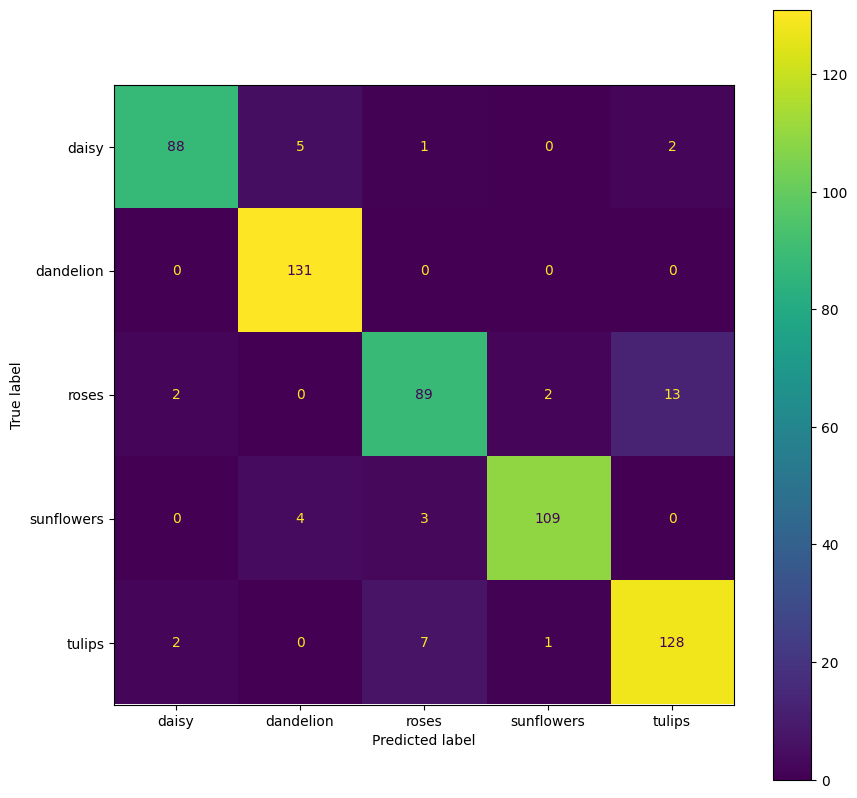

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = model_eff.predict(test)

# Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(test_label, predictions.argmax(axis=1))

# Plot
cmd = ConfusionMatrixDisplay(cm,display_labels = classes )
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

## Result Preview (10 points)
1. Download 3 flower images online
2. Display the image with their prediction's label and accuracy

In [132]:
reverse= label_encoder.inverse_transform(test_label)

In [133]:
import os
from PIL import Image

def preprocess_image(image):
    image = image.convert('RGB')
    image = image.resize((150, 150))
    image = np.array(image) / 255.0
    return image

test_folder_path = "/content/test"
if os.path.exists(test_folder_path):
    image_paths = [os.path.join(test_folder_path, image_name) for image_name in os.listdir(test_folder_path) if image_name.endswith('.jpg') or image_name.endswith('.PNG')]
    if image_paths:
        plt.figure(figsize=(15, 5))
        for i, image_path in enumerate(image_paths):
            imgg = Image.open(image_path)
            imgg = preprocess_image(imgg)
            predictions = model.predict(np.expand_dims(imgg, axis=0))[0]
            predicted_label = np.argmax(predictions)

            plt.subplot(1, len(image_paths), i + 1)
            plt.imshow(imgg)
            plt.title(f"Predicted Label: {predicted_label}")
            plt.axis('off')
        plt.show()
    else:
        print("No image files found in the test folder.")
else:
    print("Test folder not found.")


Test folder not found.
